In [6]:
import warnings; warnings.simplefilter('ignore')

import hotspot
import scanpy as sc
import muon as mu
import pandas as pd
import numpy as np
import mplscience
import os
# import new_misc_code as nmc a
import pickle
hotspot.__version__

'1.1.1'

In [7]:
os.chdir("/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_h5")

In [8]:
import glob
H5data=[]
for line in  glob.glob("*h5"):
    # print(line)
    H5data.append(line)
print(H5data)

['Z48_filtered_feature_bc_matrix.h5', 'Z53_filtered_feature_bc_matrix.h5', 'Z96_filtered_feature_bc_matrix.h5', 'D25_filtered_feature_bc_matrix.h5', 'D36_filtered_feature_bc_matrix.h5', 'Z99_filtered_feature_bc_matrix.h5', 'Z38_filtered_feature_bc_matrix.h5', 'Z67_filtered_feature_bc_matrix.h5', 'Z07_filtered_feature_bc_matrix.h5', 'B25_filtered_feature_bc_matrix.h5', 'D9_filtered_feature_bc_matrix.h5', 'D27_filtered_feature_bc_matrix.h5', 'Z52_filtered_feature_bc_matrix.h5', 'Z47_filtered_feature_bc_matrix.h5', 'Z77_filtered_feature_bc_matrix.h5', 'Z03_filtered_feature_bc_matrix.h5', 'C10_filtered_feature_bc_matrix.h5', 'Z42_filtered_feature_bc_matrix.h5', 'C27_filtered_feature_bc_matrix.h5', 'C36_filtered_feature_bc_matrix.h5', 'Z70_filtered_feature_bc_matrix.h5', 'Z79_filtered_feature_bc_matrix.h5', 'z104_filtered_feature_bc_matrix.h5', 'Z36_filtered_feature_bc_matrix.h5', 'Z43_filtered_feature_bc_matrix.h5', 'Z28_filtered_feature_bc_matrix.h5', 'Z33_filtered_feature_bc_matrix.h5', 

In [9]:
filenames =H5data
adatadict_sc={}
# adatas = []
# scrub_doublet_rate=pd.DataFrame()
i=0
for filename in filenames: 
    
    dat1=sc.read_10x_h5(filename)
    name=filename.rsplit("_")[0]
    dat1.obs_names=name+"_"+dat1.obs_names 
    dat1.obs["Name"]=name 
    dat1.var_names_make_unique() 
    i+=1
    adatadict_sc[name]=dat1

In [10]:
# Import the required function
from anndata import concat

# Get the list of Anndata objects from the dictionary
adata_list = list(adatadict_sc.values())

# Concatenate the Anndata objects
adata_merged = concat(adata_list, join='outer')


In [11]:
adata1=sc.read_h5ad('/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/Data/Scanpy_merge_rmdoubulet_UMAP_label_lastCell.h5ad')

In [12]:
adata=adata_merged[adata1.obs_names]

In [13]:
adata

View of AnnData object with n_obs × n_vars = 245834 × 36601
    obs: 'Name'

In [14]:
adata.obs_names.equals(adata1.obs_names)

True

In [15]:
adata.obs=adata1.obs

In [16]:
adata.obs['Last_cell_type'].value_counts()

Naïve CD4 T             38253
Classical Monocytes     30436
Late_ERY                28078
CXCR5+ Naïve B          26800
Naïve CD8 T             14659
CX3CR1+ NK              13394
Mid_ERY                  9211
abT(entry)               8456
CXCR5- Naïve B           8381
DP(P) T                  8119
CXCR6+ NK                7395
DN(Q) T                  5410
Early_ERY                4665
Treg                     4546
DP(Q) T                  4025
Megakaryocytes           4020
DC2                      3379
HSC_MPP                  3248
Macrophages              2727
MEMP                     2527
Th17like_INNATE_T        2074
Gamma Delta V2 T         1873
NK T                     1649
Myeloid-CD177            1538
CD56highCD16low NK       1315
Endothelial cells        1142
MEP                      1134
Large pre-B              1099
GNG4 +CD8aa+T            1088
pDC                       884
Pro-B                     850
CD14+PPBP+ Monocytes      780
ILC2/3                    663
Others    

In [17]:
adata=adata[~adata.obs['Last_cell_type'].isin(['Late_ERY','Mid_ERY','Others','Macrophages_ERY','Early_ERY','Yolk Sac ERY'])]

In [18]:
# 对adata对象中的细胞根据"adjustedID"进行分组，并计算基因的总表达量
grouped = adata.obs.groupby("AdjustedID")
bulk_like_data = {}
for group, indices in grouped.groups.items():
    expression_sum = np.sum(adata[indices].X, axis=0)
    bulk_like_data[group] = expression_sum.A1 if hasattr(expression_sum, 'A1') else expression_sum

# 将基因的总表达量存储在一个新的pandas DataFrame中
bulk_like_data = pd.DataFrame(bulk_like_data, index=adata.var.index)

# 展示前5行数据
print(bulk_like_data.head())

             B11.6_P24  B12.0_P2  B17.4_P3  B18.0_P4  B18.6_P5  B20.9_P7  \
MIR1302-2HG        3.0       0.0       0.0       1.0       0.0       0.0   
FAM138A            0.0       0.0       0.0       0.0       0.0       0.0   
OR4F5              0.0       0.0       0.0       0.0       0.0       0.0   
AL627309.1        31.0       0.0       3.0      44.0      23.0      16.0   
AL627309.3         0.0       0.0       0.0       0.0       0.0       0.0   

             B21.7_P8  B22.4_P9  B22.4_P23  B23.4_P10  ...  L10.0_P1  \
MIR1302-2HG       1.0       0.0        3.0        1.0  ...       1.0   
FAM138A           0.0       0.0        0.0        0.0  ...       0.0   
OR4F5             0.0       0.0        0.0        0.0  ...       0.0   
AL627309.1       26.0      27.0       21.0       28.0  ...       3.0   
AL627309.3        0.0       0.0        0.0        0.0  ...       0.0   

             L10.1_P25  L18.6_P5  L24.6_P11  T10.0_P1  T10.1_P25  T18.6_P5  \
MIR1302-2HG        2.0       0.0

In [19]:
%load_ext rpy2.ipython

R[write to console]: 载入需要的程辑包：ggplot2

R[write to console]: Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



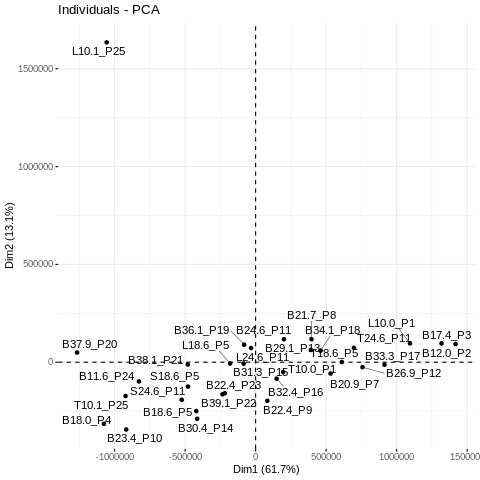

In [20]:
%%R -i bulk_like_data
pca <- prcomp(t(bulk_like_data))


library(factoextra)
pca
fviz_pca_ind(pca, repel=T) 

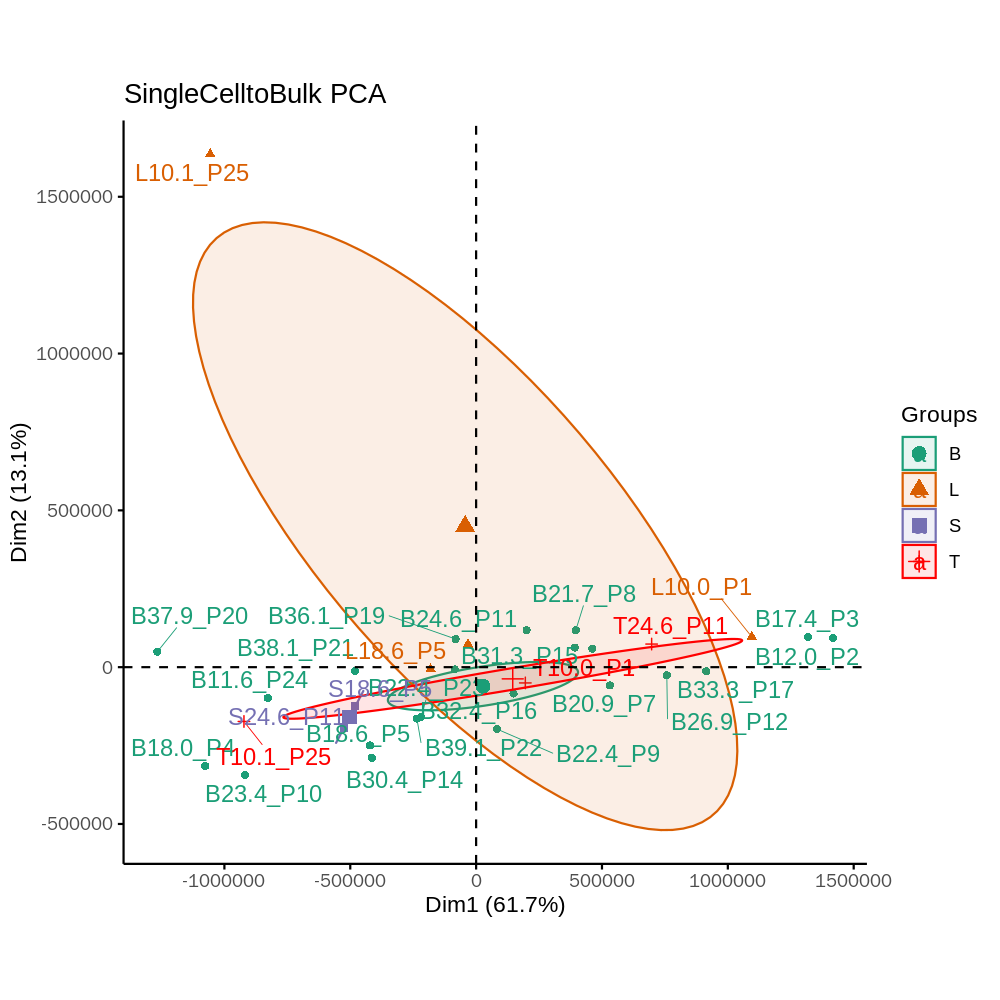

In [21]:
%%R -w 1000 -h 1000 -r 150

groups <- factor(substring(colnames(bulk_like_data),1,1))
fviz_pca_ind(pca,
             col.ind = groups, # color by groups
             palette =c('#1b9e77','#d95f02','#7570b3','red'),
             addEllipses = TRUE, # Concentration ellipses
             ellipse.type = "confidence",
             legend.title = "Groups",
             repel = TRUE,ggtheme = theme_classic(),title='SingleCelltoBulk PCA'
             )+theme(aspect.ratio = 1)

In [22]:
%%R 
library(ClusterGVis)
library(data.table)
library(tidyverse)
library(data.table)
library(tidyverse)
library(tidyverse)
library("clusterProfiler")
library("org.Hs.eg.db")
library(ggplot2)
library(RColorBrewer)
library(gridExtra)
library(enrichplot)
library(ggsci)
library(ggrepel)
source("~/mao/Codeman/Project/All_Gao_ScanpyProject/Mainfun.R")

R[write to console]: 载入需要的程辑包：monocle

R[write to console]: 载入需要的程辑包：Matrix

R[write to console]: 载入需要的程辑包：Biobase

R[write to console]: 载入需要的程辑包：BiocGenerics

R[write to console]: 
载入程辑包：‘BiocGenerics’


R[write to console]: The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


R[write to console]: The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


R[write to console]: Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkg

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()         masks data.table::between()
✖ dplyr::combine()         masks Biobase::combine(), BiocGenerics::combine()
✖ tidyr::expand()          masks Matrix::expand()
✖ dplyr::filter()          masks stats::filter()
✖ dplyr::first()           masks data.table::first()
✖ lubridate::hour()        masks data.table::hour()
✖ lubridate::isoweek()     masks data.table::isoweek()
✖ dplyr::lag()             masks stats::lag()
✖ dplyr::last()            masks data.table::last()
✖ lubridate::mday()        masks data.table::mday()
✖ lubridate::minute()      masks data.table::minute()
✖ lubridate::month()       masks data.table::month()
✖ tidyr::pack()            mas

R[write to console]: 

R[write to console]: clusterProfiler v4.7.1.002  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141

R[write to console]: 
载入程辑包：‘clusterProfiler’


R[write to console]: The following object is masked from ‘package:purrr’:

    simplify


R[write to console]: The following object is masked from ‘package:stats’:

    filter


R[write to console]: 载入需要的程辑包：AnnotationDbi

R[write to console]: 载入需要的程辑包：IRanges

R[write to console]: 载入需要的程辑包：S4Vectors

R[write to console]: 
载入程辑包：‘S4Vectors’


R[write to console]: The following object is masked from ‘package:clusterProfiler’:

    rename


R[write to console]: The following objects are masked from ‘package:lubridate’:

    second, 

In [23]:
import pandas as pd
import re

def parse_gene_name(attributes):
    match = re.search('gene_name \"(.*?)\";', attributes)
    if match:
        return match.group(1)
    return None

def calculate_gene_length(gtf_file):
    gtf_data = pd.read_csv(gtf_file, sep='\t', header=None, comment='#')
    gtf_data = gtf_data[gtf_data[2] == 'gene']
    gtf_data['gene_name'] = gtf_data[8].apply(parse_gene_name)
    gtf_data['length'] = gtf_data[4] - gtf_data[3] + 1
    gene_length = gtf_data[['gene_name', 'length']]

    return gene_length

gtf_file = '/home/maolp/mao/Ref/refdata-gex-GRCh38-2020-A/genes/genes.gtf'  # 将这里的路径替换为你的GTF文件的路径
gene_length = calculate_gene_length(gtf_file)

print(gene_length)

           gene_name  length
0        MIR1302-2HG    1556
8            FAM138A    1528
16             OR4F5    6167
35        AL627309.1   44429
58        AL627309.3    1555
...              ...     ...
2765866   AC141272.1     288
2765870   AC023491.2    2404
2765877   AC007325.1    2404
2765884   AC007325.4    5899
2765900   AC007325.2   23771

[36601 rows x 2 columns]


In [24]:
bulk_like_data['gene_name']=bulk_like_data.index.to_list()

In [25]:

merged_data = pd.merge(bulk_like_data, gene_length, left_index=True, right_on='gene_name')

print(merged_data)

           gene_name  B11.6_P24  B12.0_P2  B17.4_P3  B18.0_P4  B18.6_P5  \
0        MIR1302-2HG        3.0       0.0       0.0       1.0       0.0   
8            FAM138A        0.0       0.0       0.0       0.0       0.0   
16             OR4F5        0.0       0.0       0.0       0.0       0.0   
35        AL627309.1       31.0       0.0       3.0      44.0      23.0   
58        AL627309.3        0.0       0.0       0.0       0.0       0.0   
...              ...        ...       ...       ...       ...       ...   
2765866   AC141272.1        0.0       0.0       0.0       0.0       0.0   
2765870   AC023491.2        0.0       0.0       0.0       0.0       0.0   
2765877   AC007325.1        0.0       0.0       0.0       0.0       0.0   
2765884   AC007325.4        0.0       0.0       0.0       4.0       1.0   
2765900   AC007325.2        0.0       0.0       0.0       1.0       2.0   

         B20.9_P7  B21.7_P8  B22.4_P9  B22.4_P23  ...  L24.6_P11  T10.0_P1  \
0             0.0    

In [26]:
%%R -i merged_data
merged_data<-merged_data[!duplicated(merged_data$gene_name),]
countToTpm <- function(counts, effLen)
{
  rate <- log(counts) - log(effLen)
  denom <- log(sum(exp(rate)))
  exp(rate - denom + log(1e6))
}
expdata_tpm=as.data.frame(apply(merged_data[,2:33], 2, function(x)countToTpm(x,merged_data$length)))
rownames(expdata_tpm)<- merged_data$gene_name                       

In [27]:
%%R -i merged_data
expdata_logtpm=log(expdata_tpm+1)

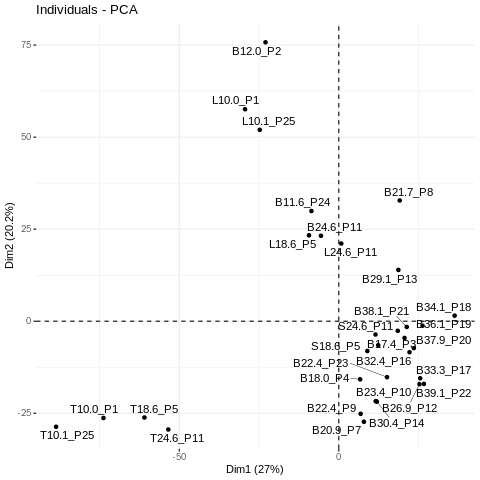

In [28]:
%%R
pca <- prcomp(t(expdata_logtpm))


library(factoextra)
pca
fviz_pca_ind(pca, repel=T) 

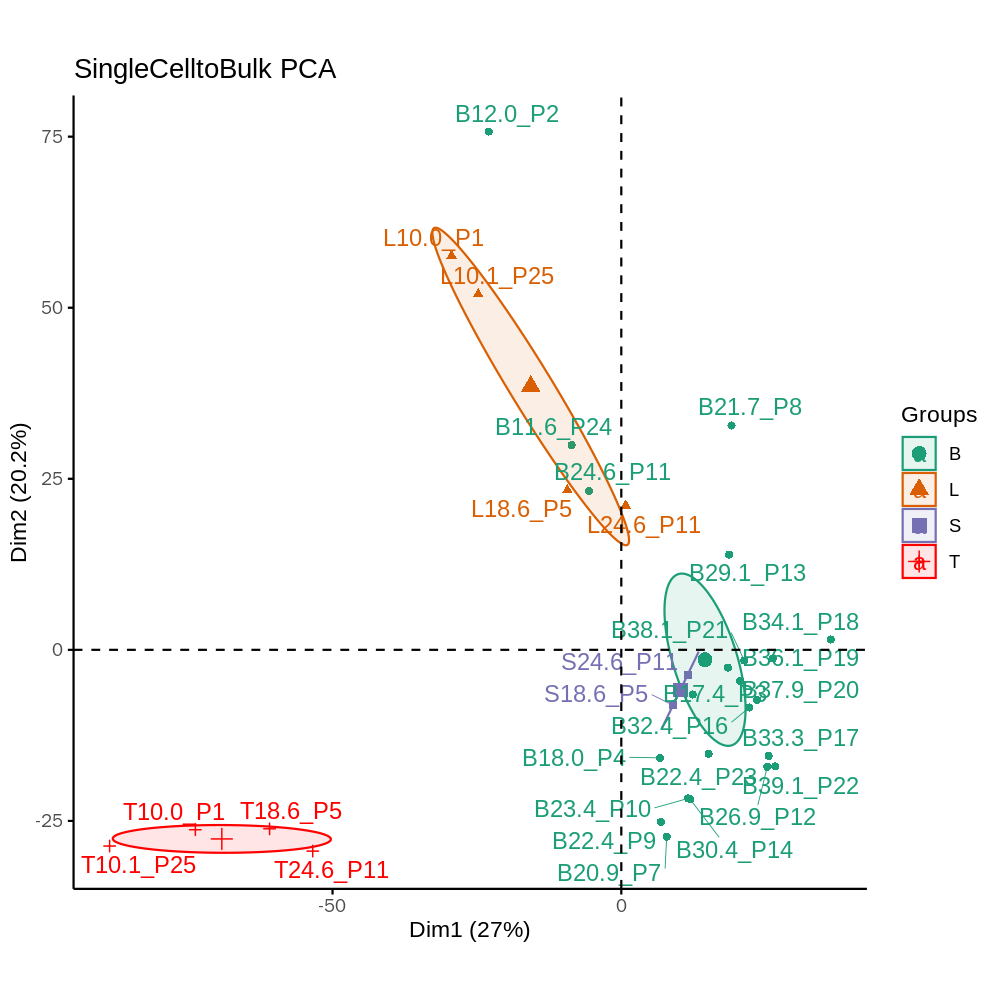

In [29]:
%%R -w 1000 -h 1000 -r 150

groups <- factor(substring(colnames(expdata_logtpm),1,1))
fviz_pca_ind(pca,
             col.ind = groups, # color by groups
             palette =c('#1b9e77','#d95f02','#7570b3','red'),
             addEllipses = TRUE, # Concentration ellipses
             ellipse.type = "confidence",
             legend.title = "Groups",
             repel = TRUE,ggtheme = theme_classic(),title='SingleCelltoBulk PCA'
             )+theme(aspect.ratio = 1)

In [30]:
%%R
PBMCexpdata_logtpm=expdata_logtpm[,grepl('B',colnames(expdata_logtpm))]

In [31]:
%%R
PBMCexpdata_logtpm_nozero=PBMCexpdata_logtpm[rowSums(PBMCexpdata_logtpm)>0,]
dim(PBMCexpdata_logtpm_nozero)

[1] 31466    22


In [32]:
%%R
# using mfuzz for clustering
# mfuzz
cm <- clusterData(exp =PBMCexpdata_logtpm_nozero,
                  cluster.method = "mfuzz",
                  cluster.num = 16)

R[write to console]: 
载入程辑包：‘widgetTools’


R[write to console]: The following object is masked from ‘package:dplyr’:

    funs


R[write to console]: 
载入程辑包：‘DynDoc’


R[write to console]: The following object is masked from ‘package:BiocGenerics’:

    path




0 genes excluded.
Error in `dplyr::filter()`:
ℹ In argument: `cluster2 == x`.
Caused by error:
! 找不到对象'cluster2'
Run `rlang::last_trace()` to see where the error occurred.


R[write to console]: Warning messages:

R[write to console]: 1: ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps 

R[write to console]: 2: ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps 

R[write to console]: 3: ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps 

R[write to console]: 4: 没有DISPLAY变量，因此没有Tk这个功能 




Error in dplyr::filter(., cluster2 == x) : 
Caused by error:
! 找不到对象'cluster2'


RInterpreterError: Failed to parse and evaluate line '# using mfuzz for clustering\n# mfuzz\ncm <- clusterData(exp =PBMCexpdata_logtpm_nozero,\n                  cluster.method = "mfuzz",\n                  cluster.num = 16)\n'.
R error message: "Error in dplyr::filter(., cluster2 == x) : \nCaused by error:\n! 找不到对象'cluster2'"

In [ ]:
%%R
enrich <- enrichCluster(object = cm,
                        OrgDb = org.Hs.eg.db,
                        type = "BP",
                        pvalueCutoff = 0.05,
                        topn = 5,
                        seed = 666)

In [ ]:
%%R -w 3800 -h 6000 -r 300
# visCluster(object = cm,
#            plot.type = "heatmap")
visCluster(object = cm,
            plot.type = "both",
           column_names_rot = 45,
           add.box = F,
           add.line = T,annoTerm.data = enrich)